## Resize

click this link to download image dataset : https://drive.google.com/file/d/1BwNYRbkdg7hJaO4fmbPiiKny1c0ZsdtO/view?usp=sharing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv
import plotly.express as px

In [ ]:
def Count_Up(img,img_check):
    count_up = 0
    check_up = False
    for i in range(28):
        for j in range(28):
            if img[i,j] < max(img_check):
                check_up = True
                break
        if check_up == True:
            break
        count_up += 1
    return count_up

def Count_Down(img,img_check):
    count_down = 0
    check_down = False
    for i in range(27,0,-1):
        for j in range(28):
            if img[i,j] < max(img_check):
                check_down = True
                break
        if check_down == True:
            break
        count_down += 1
    return count_down

def Count_Left(img,img_check):
    count_left = 0
    check_left = False
    for i in range(28):
        for j in range(28):
            if img[j,i] < max(img_check):
                check_left = True
                break
        if check_left == True:
            break
        count_left += 1
    return count_left

def Count_Right(img,img_check):
    count_right = 0
    check_right = False
    for i in range(27,0,-1):
        for j in range(27,0,-1):
            if img[j,i] < max(img_check):
                check_right = True
                break
        if check_right == True:
            break
        count_right += 1
    return count_right

def change_position(img,img_check):
    crop_img = img
    dummy = np.full(28,255,dtype='uint8')
    dummy2 = np.full([28,1],255,dtype='uint8')

    count_array = []
    count_array.append(Count_Up(crop_img,img_check))
    count_array.append(Count_Down(crop_img,img_check))
    count_array.append(Count_Left(crop_img,img_check))
    count_array.append(Count_Right(crop_img,img_check))

    #vertical_change_position
    avg_vertical = (count_array[0] + count_array[1])/2
    while Count_Up(crop_img,img_check) - avg_vertical > 0.5:
        crop_img = crop_img[1:crop_img.shape[0], :]
        crop_img = np.vstack([crop_img,dummy])
    while Count_Down(crop_img,img_check) - avg_vertical > 0.5:
        crop_img = crop_img[0:crop_img.shape[0]-1, :]
        crop_img = np.vstack([dummy,crop_img])

    #horizontal_change_position
    avg_horizontal = (count_array[2] + count_array[3])/2
    while Count_Left(crop_img,img_check) - avg_horizontal > 0.5:
        crop_img = crop_img[:,1:crop_img.shape[1]]
        crop_img = np.hstack([crop_img,dummy2])
    while Count_Right(crop_img,img_check) - avg_horizontal > 0.5:
        crop_img = crop_img[:, 0:crop_img.shape[1]-1]
        crop_img = np.hstack([dummy2,crop_img])

    return crop_img

In [ ]:
for j in range(0,10):
    for i in range(1,41):
        count_array = []
        file = str(j) + "-" + str(i) + ".png"
        img = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        #img_check = img.flatten()
        img_check = [0,240]
        crop_img = change_position(img,img_check)
        count_array.append(Count_Up(crop_img,img_check))
        count_array.append(Count_Down(crop_img,img_check))
        count_array.append(Count_Left(crop_img,img_check))
        count_array.append(Count_Right(crop_img,img_check))

        crop_img = crop_img[min(count_array):crop_img.shape[0], :]
        crop_img = crop_img[0:crop_img.shape[0]-min(count_array), :]
        crop_img = crop_img[:, min(count_array):crop_img.shape[1]]
        crop_img = crop_img[:, 0:crop_img.shape[1]-min(count_array)]
        crop_img = cv2.resize(crop_img,(28,28))

        newfile = "new_" + str(j) + "-" + str(i) + ".png"
        cv2.imwrite(newfile,crop_img)

(-0.5, 27.5, 27.5, -0.5)

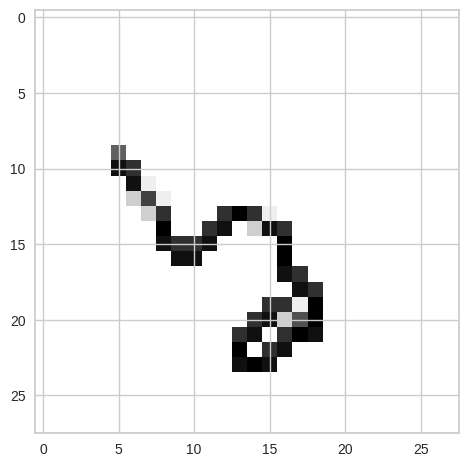

In [ ]:
#ตัวอย่างรูปก่อน resize
file = "6-1.png"
image  = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = plt.cm.gray)
plt.axis('on')

(-0.5, 27.5, 27.5, -0.5)

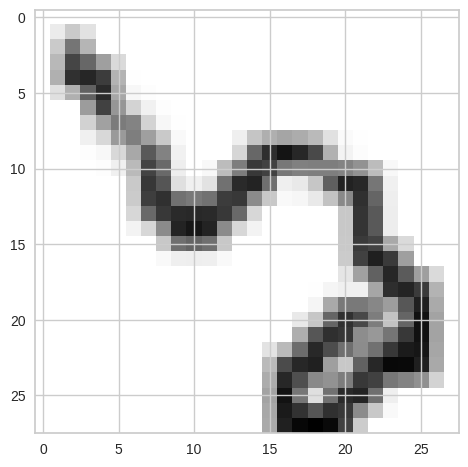

In [ ]:
#ตัวอย่างรูปหลัง resize
file = "new_6-1.png"
image  = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = plt.cm.gray)
plt.axis('on')

## Convert to CSV

In [ ]:
import cv2
# numpy กับ matplotlib เองก็ใช้ตลอดด้วย แนะนำให้ import ไปด้วยทุกครั้ง
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

lst = []
col = ['y']
for i in range(1,785):
    name = 'pixel'+str(i)
    col.append(name)
newfile = "pixel_num_new.csv"
with open(newfile, 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(col)
for k in range(0,10):
    for i in range(1,41):
        file = "new_" + str(k) + "-" + str(i) + ".png"
        rup = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
        rup = rup.flatten()
        lst = []
        lst.append(str(k))
        for j in rup:
            lst.append(j)
        with open(newfile, 'a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(lst)

## EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [ ]:
train = pd.read_csv('/content/pixel_num_new.csv')
train.head()

,y,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,255,255,255,255,255,255,255,255,254,...,189,230,255,253,253,254,255,253,253,255
1,0,255,254,254,253,250,245,252,254,253,...,255,255,254,251,249,252,254,253,253,254
2,0,255,255,255,255,255,255,255,255,255,...,254,254,254,254,255,255,255,255,255,255
3,0,251,253,254,255,255,255,255,254,252,...,255,255,255,255,255,255,255,255,255,255
4,0,252,252,253,253,253,252,250,250,253,...,210,237,255,254,252,251,255,253,253,254


In [ ]:
print(train.info())
print("\n SHape of the dataset:", train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 785 entries, y to pixel784
dtypes: int64(785)
memory usage: 2.4 MB
None

 SHape of the dataset: (400, 785)


In [ ]:
train.describe()

,y,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,4.500000,253.625000,250.7075,247.650000,245.027500,244.770000,247.130000,250.737500,252.940000,253.367500,...,234.425000,240.502500,244.842500,248.145000,248.325000,248.865000,251.397500,253.385000,254.360000,254.697500
std,2.875878,13.682009,22.9640,29.830473,33.729229,36.270387,28.633333,17.595243,10.907053,9.695486,...,53.827296,45.077043,38.418128,30.783161,29.695352,26.809301,20.880241,12.731536,6.810754,0.835307
min,0.000000,64.000000,53.0000,40.000000,48.000000,39.000000,51.000000,131.000000,147.000000,137.000000,...,0.000000,0.000000,0.000000,6.000000,11.000000,16.000000,16.000000,76.000000,119.000000,241.000000
25%,2.000000,254.750000,254.0000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,253.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
50%,4.500000,255.000000,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
75%,7.000000,255.000000,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
max,9.000000,255.000000,255.0000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
a = train.groupby('y').size().to_frame('count')
a = a.reset_index()
fig2 = px.bar(a, x="y", y="count", title="Count by Number")
fig2.show()

(-0.5, 27.5, 27.5, -0.5)

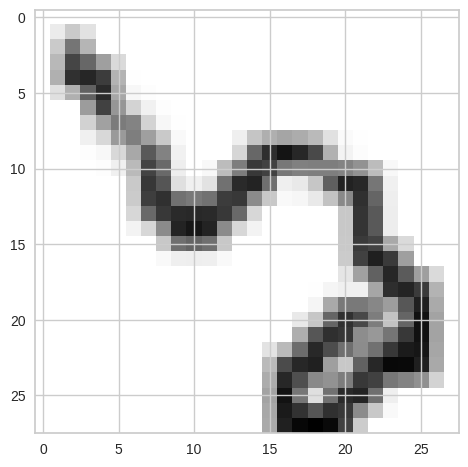

In [ ]:
file = "new_6-1.png"
image  = cv2.imread(file,cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = plt.cm.gray)
plt.axis('on')

## Model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# โหลดข้อมูลให้อยู่ใน df_num และ show รายละเอียดข้อมูล
df_num =pd.read_csv('pixel_num_new.csv')
df_num.info()
df_num.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 785 entries, y to pixel784
dtypes: int64(785)
memory usage: 2.4 MB


,y,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,255,255,255,255,255,255,255,255,254,...,189,230,255,253,253,254,255,253,253,255
1,0,255,254,254,253,250,245,252,254,253,...,255,255,254,251,249,252,254,253,253,254
2,0,255,255,255,255,255,255,255,255,255,...,254,254,254,254,255,255,255,255,255,255
3,0,251,253,254,255,255,255,255,254,252,...,255,255,255,255,255,255,255,255,255,255
4,0,252,252,253,253,253,252,250,250,253,...,210,237,255,254,252,251,255,253,253,254


In [ ]:
# split train and test dataset
data = df_num.sample(frac=0.8, random_state=42)
data_unseen = df_num.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (320, 785)
Unseen Data For Predictions: (80, 785)


In [ ]:
#!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
numeric_features = data.columns.tolist()
numeric_features.remove('y')
numeric_features[:5]

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5']

In [ ]:
data.y.value_counts()

0    35
3    35
5    34
2    32
8    32
9    32
7    31
1    31
4    30
6    28
Name: y, dtype: int64

In [ ]:
exp_name = setup(data = data, target = 'y')

,Description,Value
0,Session id,2683
1,Target,y
2,Target type,Multiclass
3,Original data shape,"(320, 785)"
4,Transformed data shape,"(320, 785)"
5,Transformed train set shape,"(224, 785)"
6,Transformed test set shape,"(96, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9603,0.9974,0.9603,0.9699,0.9575,0.9557,0.9573,0.9870
rf,Random Forest Classifier,0.9470,0.9971,0.9470,0.9592,0.9449,0.9409,0.9427,1.0720
lr,Logistic Regression,0.9291,0.9899,0.9291,0.9472,0.9272,0.9209,0.9232,1.4450
lightgbm,Light Gradient Boosting Machine,0.9158,0.9885,0.9158,0.9316,0.9087,0.9062,0.9098,3.0440
svm,SVM - Linear Kernel,0.8800,0.0000,0.8800,0.8862,0.8698,0.8663,0.8714,0.2040
lda,Linear Discriminant Analysis,0.8709,0.9752,0.8709,0.8920,0.8658,0.8562,0.8601,0.3380
ridge,Ridge Classifier,0.8672,0.0000,0.8672,0.8958,0.8607,0.8522,0.8577,0.1750
knn,K Neighbors Classifier,0.8484,0.9803,0.8484,0.8694,0.8349,0.8312,0.8380,0.2360
nb,Naive Bayes,0.8443,0.9219,0.8443,0.8584,0.8246,0.8262,0.8353,0.2350
xgboost,Extreme Gradient Boosting,0.8221,0.9789,0.8221,0.8618,0.8137,0.8017,0.8090,3.5640


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
model = create_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9969,0.9565,0.9710,0.9536,0.9515,0.9535
1,0.9565,1.0000,0.9565,0.9674,0.9553,0.9515,0.9535
2,0.9130,0.9979,0.9130,0.9384,0.8988,0.9032,0.9089
3,0.9130,0.9915,0.9130,0.9130,0.9130,0.9030,0.9030
4,0.9545,0.9977,0.9545,0.9697,0.9515,0.9493,0.9515
5,0.9545,0.9977,0.9545,0.9697,0.9515,0.9493,0.9515
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9545,0.9920,0.9545,0.9697,0.9515,0.9493,0.9515
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

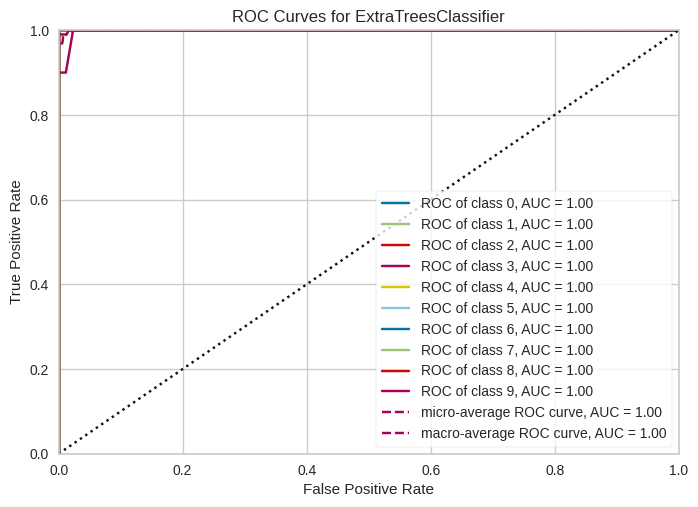

In [ ]:
plot_model(model)

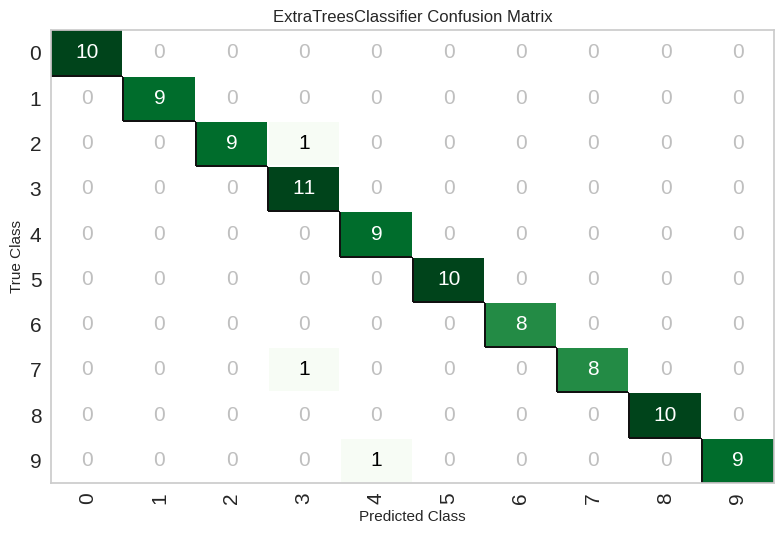

In [ ]:
plot_model(model, 'confusion_matrix')

In [ ]:
predictions = predict_model(model)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9688,0.9998,0.9688,0.9730,0.9690,0.9652,0.9657


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y,prediction_label,prediction_score
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,5,5,0.51
295,255,255,255,255,255,255,255,255,255,255,...,187,198,226,254,255,255,255,8,8,0.82
24,255,255,255,255,255,255,255,255,254,252,...,253,253,254,255,253,253,255,0,0,0.81
291,255,255,255,255,255,255,255,255,255,129,...,255,255,255,255,255,255,255,1,1,0.88
277,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,5,5,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,0,0,0.81
19,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,9,9,0.76
211,255,255,255,255,254,211,189,221,253,255,...,255,255,221,229,255,255,255,2,2,0.67
177,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,5,5,0.70


In [ ]:
pred_unseen = predict_model(model, data = data_unseen)
pred_unseen

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9625,0.9968,0.9625,0.9643,0.9623,0.9580,0.9582


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y,prediction_label,prediction_score
0,255,254,254,253,250,245,252,254,253,243,...,251,249,252,254,253,253,254,0,0,0.90
1,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,0,0,0.74
2,255,255,255,255,255,255,255,255,254,253,...,255,255,255,255,255,255,255,0,0,0.74
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,0,0,0.64
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,0,0,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,9,9,0.61
76,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,9,9,0.42
77,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,9,9,0.84
78,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,9,9,0.74


In [ ]:
final_model = finalize_model(model)
final_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pixel1', 'pixel2', 'pixel3',
                                             'pixel4', 'pixel5', 'pixel6',
                                             'pixel7', 'pixel8', 'pixel9',
                                             'pixel10', 'pixel11', 'pixel12',
                                             'pixel13', 'pixel14', 'pixel15',
                                             'pixel16', 'pixel17', 'pixel18',
                                             'pixel19', 'pixel20', 'pixel21',
                                             'pixel22', 'pixel23', 'pixel24',
                                             '...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=2683,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
save_model(model, 'thainumber_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pixel1', 'pixel2', 'pixel3',
                                              'pixel4', 'pixel5', 'pixel6',
                                              'pixel7', 'pixel8', 'pixel9',
                                              'pixel10', 'pixel11', 'pixel12',
                                              'pixel13', 'pixel14', 'pixel15',
                                              'pixel16', 'pixel17', 'pixel18',
                                              'pixel19', 'pixel20', 'pixel21',
                                              'pixel22', 'pixel23', 'pixel24',
                                              '...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                      